# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.057967e+01     8.322659e+00
 * time: 0.0015940666198730469
     1     2.937686e+01     5.294272e+00
 * time: 0.005571126937866211
     2     2.273421e+01     6.574957e+00
 * time: 0.010293006896972656
     3     1.872719e+01     7.609568e+00
 * time: 0.014966964721679688
     4     1.499544e+01     4.530291e+00
 * time: 0.01960301399230957
     5     1.111391e+01     1.706887e+00
 * time: 0.024332046508789062
     6     1.036808e+01     1.738794e+00
 * time: 0.0286099910736084
     7     9.594493e+00     1.529351e+00
 * time: 0.03266310691833496
     8     9.051962e+00     1.153642e+00
 * time: 0.03662300109863281
     9     8.645481e+00     9.963080e-01
 * time: 0.0411229133605957
    10     8.388225e+00     9.147899e-01
 * time: 0.04495096206665039
    11     8.237791e+00     8.485511e-01
 * time: 0.04886913299560547
    12     8.116859e+00     8.360106e-01
 * time: 0.052880048751831055
    13     8.088180e+00     7.302759e-01
 * 

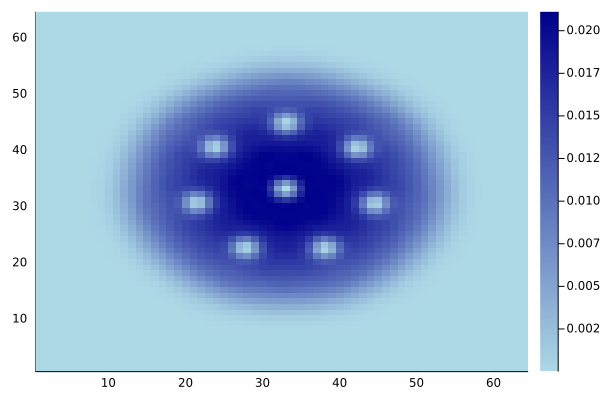

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)